# PROYECTO
### Alicia Paola Méndez Girón
### 20000135

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.pipeline import Pipeline
from feature_engine.imputation import(
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer
)

from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder
)

from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection import DropFeatures

import joblib

In [ ]:
import my_preprocessors as mypp

In [4]:
pd.pandas.set_option('display.max_columns', None) #habilitamos despliegue maximo de columnas

In [7]:
data = pd.read_csv("train.csv")
print(data.shape)

(19735, 29)


In [8]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  T_out  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   6.60   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   6.48   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   6.37   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   6.25   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   6.13   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [40]:
data.drop('date', axis =1, inplace = True)
print(str(data.shape))

(19735, 28)


#### 2. Análisis de Datos para toma de decisiones en FE Pipeline

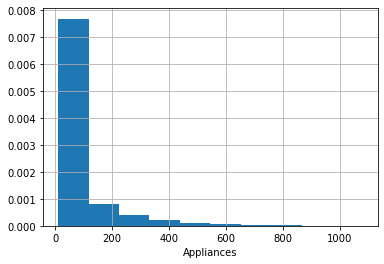

In [10]:
data['Appliances'].hist(bins = 10, density = True)
plt.xlabel('Appliances')
plt.show()

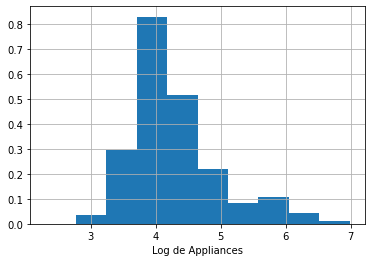

In [11]:
np.log(data['Appliances']).hist(bins = 10, density = True)
plt.xlabel('Log de Appliances')
plt.show()

In [12]:
#Variables numericas
num_vars = [var for var in data.columns ]

In [13]:
num_vars

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [14]:
var_with_na = [var for var in data.columns if (data[var].isnull().sum() > 0)] #is null mapea True o False, y por eso se suma
len(var_with_na)

0

In [15]:
year_vars = [var for var in num_vars if (('date' in var ))]
year_vars

['date']

<AxesSubplot:xlabel='date'>

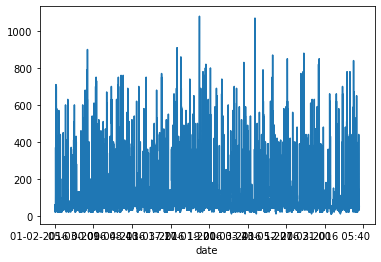

In [16]:
data.groupby('date')['Appliances'].median().plot() 

<AxesSubplot:xlabel='T2'>

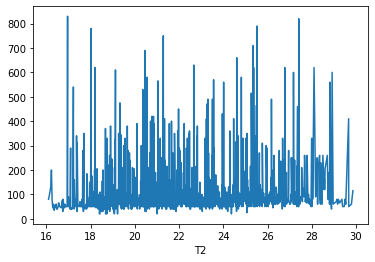

In [17]:
data.groupby('T2')['Appliances'].median().plot()

### Variables discretas

In [18]:
discrete_vars = [var for var in num_vars if ((len(data[var].unique()) < 20) and (var not in year_vars)) ]
discrete_vars

['lights']

In [19]:
data[discrete_vars].head()

lights
0      30
1      30
2      30
3      40
4      40

In [20]:
import seaborn as sns

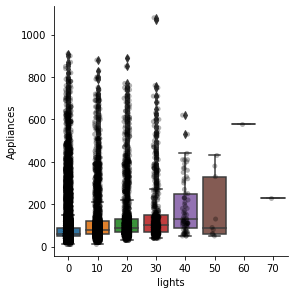

In [21]:
for var in discrete_vars:
    sns.catplot(x= var, y='Appliances', data=data, kind="box", height=4)
    sns.stripplot(x= var, y='Appliances', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

### Variables continuas

In [22]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars ]
cont_vars

['Appliances',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

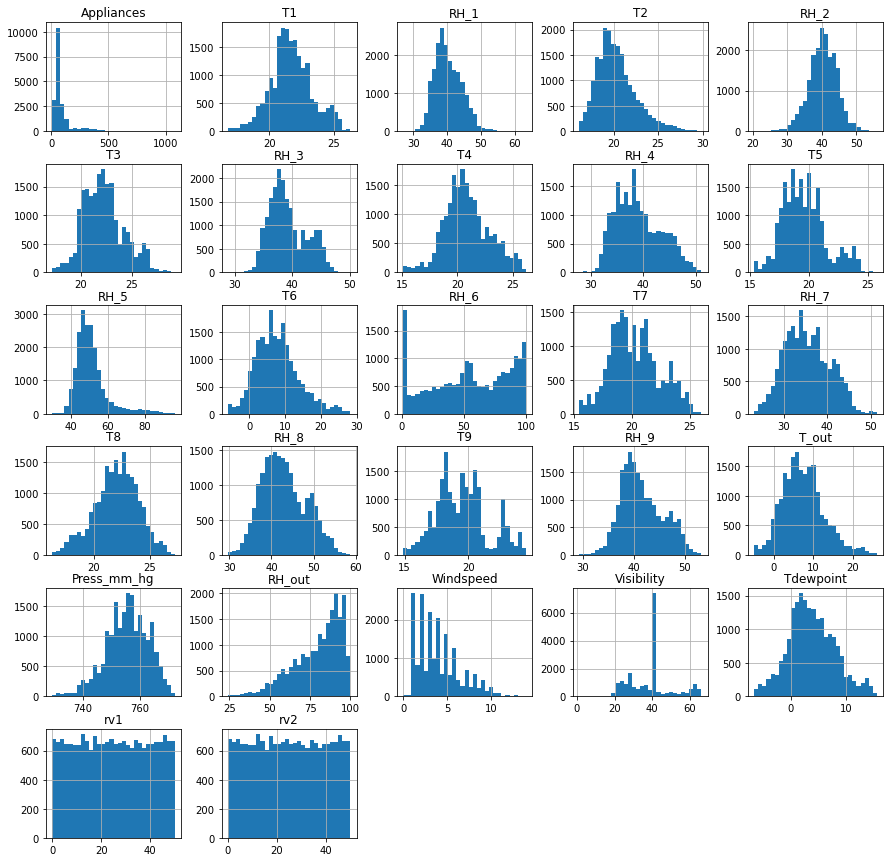

In [23]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

### Transformación especial de Yeo-Johnson

In [25]:
import scipy.stats as stats

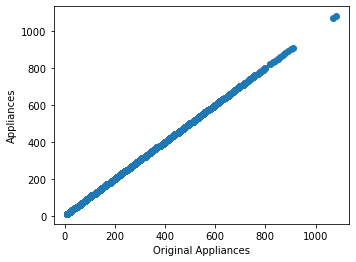

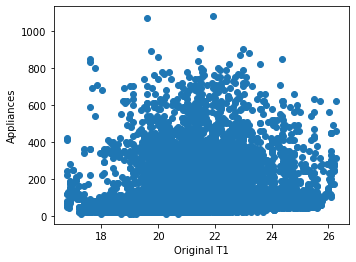

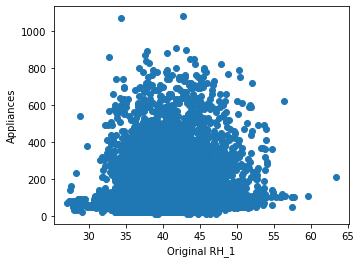

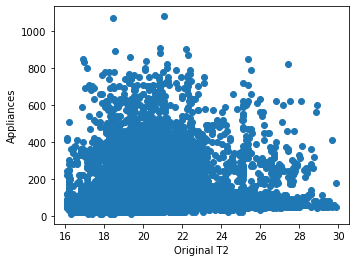

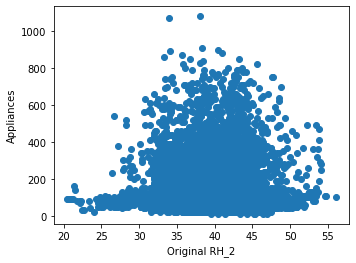

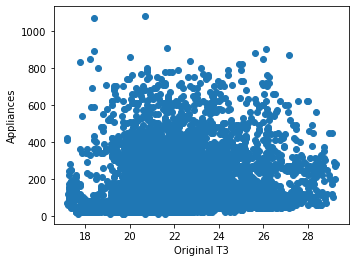

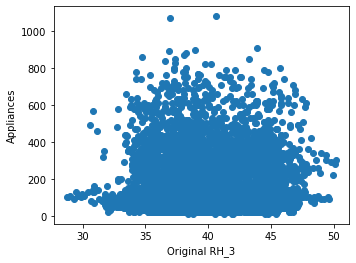

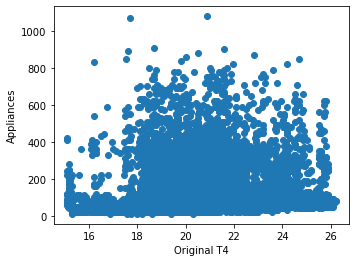

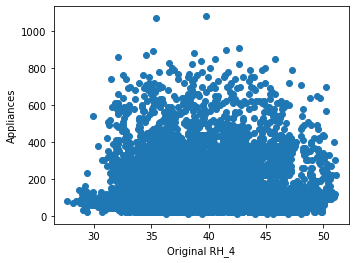

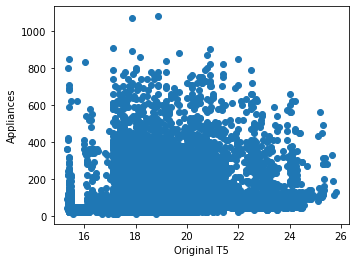

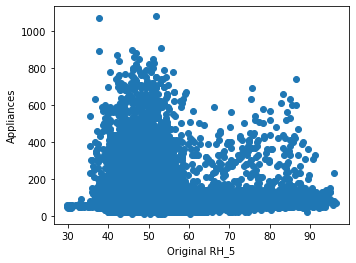

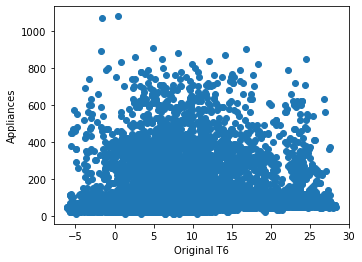

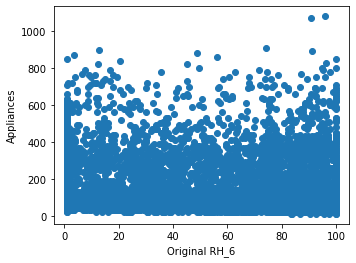

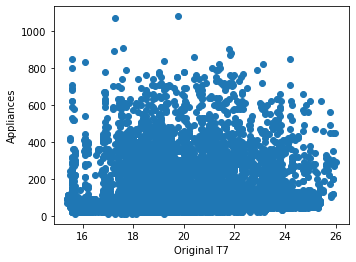

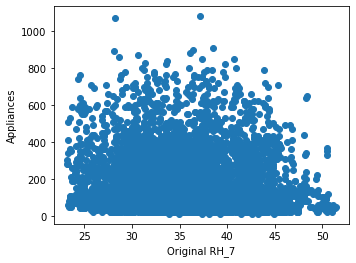

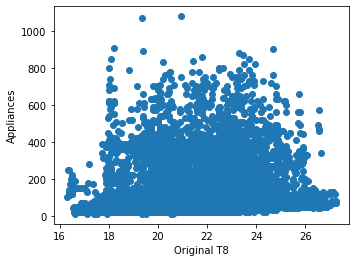

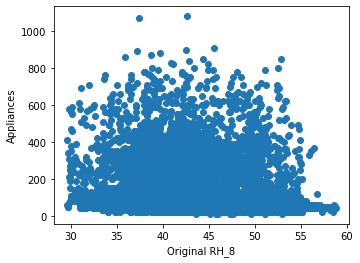

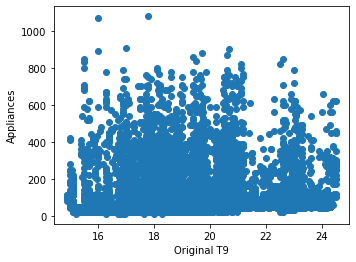

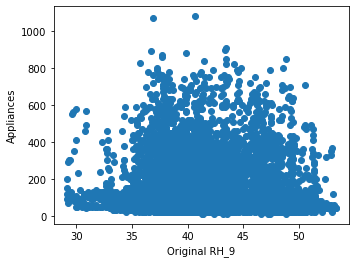

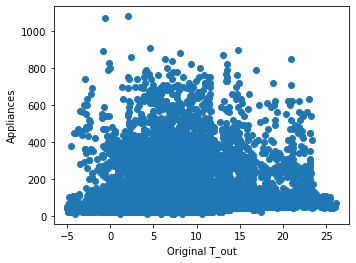

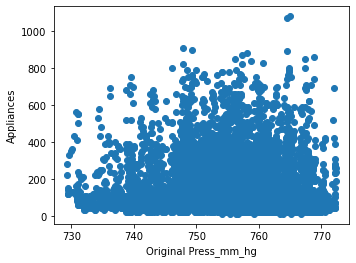

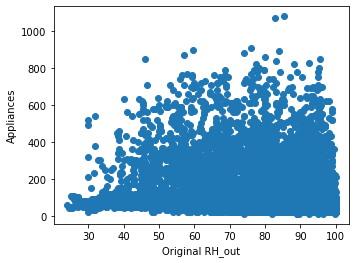

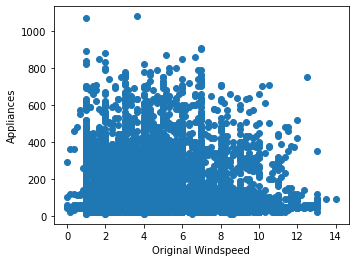

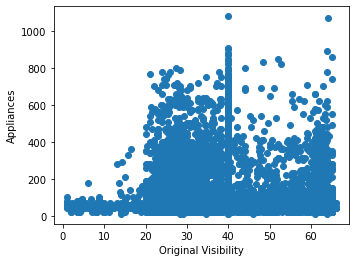

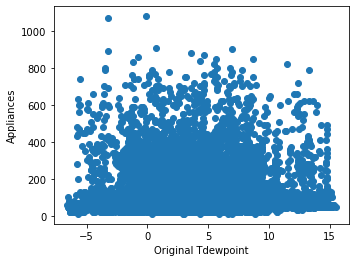

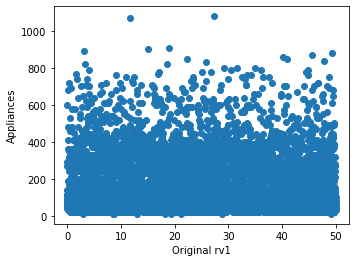

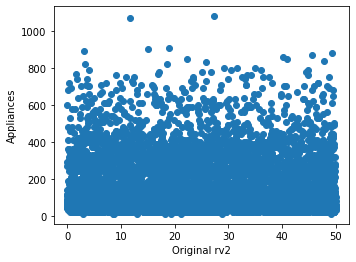

In [35]:
for var in cont_vars:
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], (data['Appliances']))
    plt.ylabel("Appliances")
    plt.xlabel("Original " + var)

    plt.show()

In [26]:
temp_yj = data.copy()
for var in cont_vars:
    temp_yj[var], param= stats.yeojohnson(data[var])

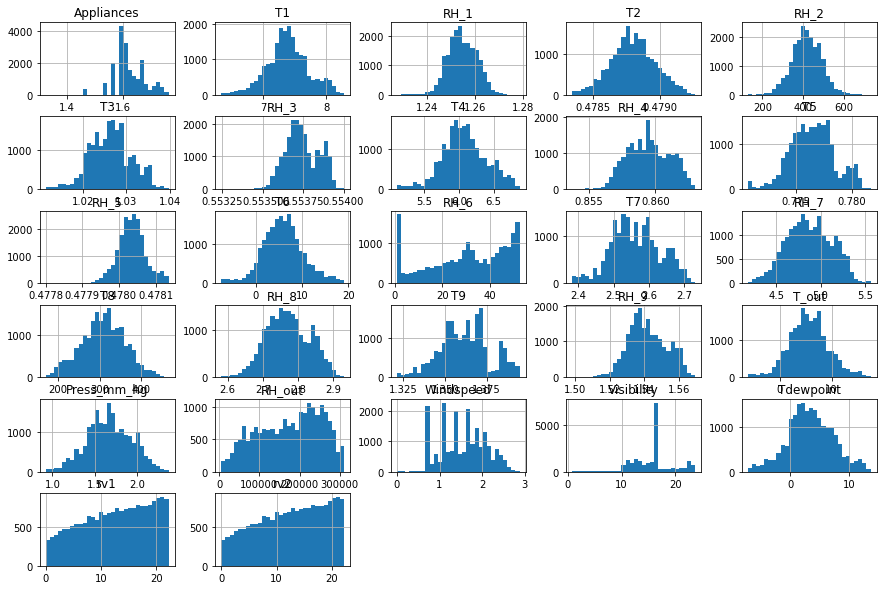

In [29]:
temp_yj[cont_vars].hist(bins=30, figsize=(15,10))
plt.show()

Se aplicará transformación de yeojohnson

No existen variables categóricas

#### Tratamiento de valores faltantes numéricos

### Feature Scaling

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
                        data.drop(['Appliances'], axis=1),
                        data['Appliances'],
                        test_size=0.25,
                        random_state=2021)

In [42]:
X_train.shape, X_test.shape, y_train.shape

((14801, 27), (4934, 27), (14801,))

In [43]:
scaler = MinMaxScaler()
scaler.clip = False 
scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [44]:
X_train.head()

lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0     0.2  0.571278  0.460783  0.314514  0.689623  0.537000  0.622994   
1     0.0  0.316790  0.315659  0.261691  0.376423  0.191093  0.318897   
2     0.0  0.606477  0.227502  0.283499  0.468624  0.490196  0.378408   
3     0.0  0.500880  0.423172  0.365277  0.567974  0.279716  0.612089   
4     0.0  0.644139  0.445189  0.445602  0.620755  0.373878  0.754012   

         T4      RH_4        T5      RH_5        T6      RH_6        T7  \
0  0.660155  0.570494  0.531295  0.247118  0.513170  0.322635  0.534402   
1  0.512549  0.282971  0.244625  0.211783  0.410417  0.354904  0.443921   
2  0.660155  0.253094  0.541806  0.290923  0.290764  0.285372  0.575872   
3  0.433765  0.658984  0.394914  0.273949  0.372284  0.939333  0.398366   
4  0.371281  0.714469  0.387960  0.536630  0.475496  0.625177  0.320452   

       RH_7        T8      RH_8        T9      RH_9     T_out  Press_mm_hg  \
0  0.493218  0.639304  0.484236  0.583767  0.573813  0.514313     0.522481   
1  0.223708  0.588038  0.340187  0.396462  0.447020  0.417819     0.886047   
2  0.419319  0.667684  0.439799  0.567861  0.417416  0.320360     0.865116   
3  0.505814  0.631065  0.466073  0.396462  0.547737  0.326150     0.449225   
4  0.594948  0.555386  0.709047  0.427680  0.773869  0.501447     0.311628   

     RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0  0.567982   0.202381    0.600000   0.526340  0.674474  0.674474  
1  0.572368   0.178571    0.946154   0.400545  0.528300  0.528300  
2  0.767544   0.071429    0.600000   0.396004  0.964530  0.964530  
3  0.879386   0.083333    0.920513   0.467302  0.124982  0.124982  
4  0.552632   0.666667    0.600000   0.500454  0.374172  0.374172

In [45]:
#Guardamos dataset con data preparada para entrenamiento.

X_train.to_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_Xtrain.csv', index=False)
X_test.to_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_Xtest.csv', index=False)

y_train.to_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_ytrain.csv', index=False)
y_test.to_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_ytest.csv', index=False)

In [46]:
joblib.dump(scaler, 'C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/minmax_scaler.joblib')

['C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/minmax_scaler.joblib']

### Selección de variables

In [47]:
X_train = pd.read_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_Xtrain.csv')
X_test = pd.read_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_Xtest.csv')
X_train.head()

lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0     0.2  0.571278  0.460783  0.314514  0.689623  0.537000  0.622994   
1     0.0  0.316790  0.315659  0.261691  0.376423  0.191093  0.318897   
2     0.0  0.606477  0.227502  0.283499  0.468624  0.490196  0.378408   
3     0.0  0.500880  0.423172  0.365277  0.567974  0.279716  0.612089   
4     0.0  0.644139  0.445189  0.445602  0.620755  0.373878  0.754012   

         T4      RH_4        T5      RH_5        T6      RH_6        T7  \
0  0.660155  0.570494  0.531295  0.247118  0.513170  0.322635  0.534402   
1  0.512549  0.282971  0.244625  0.211783  0.410417  0.354904  0.443921   
2  0.660155  0.253094  0.541806  0.290923  0.290764  0.285372  0.575872   
3  0.433765  0.658984  0.394914  0.273949  0.372284  0.939333  0.398366   
4  0.371281  0.714469  0.387960  0.536630  0.475496  0.625177  0.320452   

       RH_7        T8      RH_8        T9      RH_9     T_out  Press_mm_hg  \
0  0.493218  0.639304  0.484236  0.583767  0.573813  0.514313     0.522481   
1  0.223708  0.588038  0.340187  0.396462  0.447020  0.417819     0.886047   
2  0.419319  0.667684  0.439799  0.567861  0.417416  0.320360     0.865116   
3  0.505814  0.631065  0.466073  0.396462  0.547737  0.326150     0.449225   
4  0.594948  0.555386  0.709047  0.427680  0.773869  0.501447     0.311628   

     RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0  0.567982   0.202381    0.600000   0.526340  0.674474  0.674474  
1  0.572368   0.178571    0.946154   0.400545  0.528300  0.528300  
2  0.767544   0.071429    0.600000   0.396004  0.964530  0.964530  
3  0.879386   0.083333    0.920513   0.467302  0.124982  0.124982  
4  0.552632   0.666667    0.600000   0.500454  0.374172  0.374172

In [48]:
y_train = pd.read_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_ytrain.csv')
y_test = pd.read_csv('C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/prep_ytest.csv')
y_train.head()

Appliances
0         340
1         290
2          50
3         100
4          60

In [49]:
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [50]:
sel_.get_support().sum()

26

In [51]:
selected_features = X_train.columns[(sel_.get_support())]

In [52]:
selected_features

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1'],
      dtype='object')

### Entrenamiento del Modelo

In [53]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [63]:
linear_model = Lasso(alpha=0.001, random_state=2022)

#entrenando modelo
linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

In [60]:
# Modelo a seleccionar
class_model = ExtraTreesClassifier()
class_model.fit(X_train, y_train)

<ipython-input-60-8e3fff84b76b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  class_model.fit(X_train, y_train)


ExtraTreesClassifier()

### Predicciones

In [64]:
preds_train = linear_model.predict(X_train)
preds_test= linear_model.predict(X_test)

In [67]:
#Resultados del Train
print("MSE de entrenamiento: {}".format(mean_squared_error((y_train), (preds_train))))
print("RMSE de entrenamiento: {}".format(mean_squared_error((y_train)
                                                            , (preds_train)
                                                           , squared=False)))
print("R2 de entrenamiento: {}".format(r2_score((y_train), (preds_train))))

MSE de entrenamiento: 8860.930601586426
RMSE de entrenamiento: 94.13251617579563
R2 de entrenamiento: 0.16490865672271726


In [68]:
#Resultados del test
print("MSE de entrenamiento: {}".format(mean_squared_error((y_test), (preds_test))))
print("RMSE de entrenamiento: {}".format(mean_squared_error((y_test)
                                                            , (preds_test)
                                                           , squared=False)))
print("R2 de entrenamiento: {}".format(r2_score((y_test), (preds_test))))

MSE de entrenamiento: 8539.478607058256
RMSE de entrenamiento: 92.40929935378936
R2 de entrenamiento: 0.16368473442898712


In [69]:
joblib.dump(modelo_clasific, 'C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/linear_lasso.joblib')

['C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/linear_lasso.joblib']

### CONFIGURACIÓN PIPELINE

In [84]:
data = pd.read_csv('train.csv')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
        data.drop(['Appliances'], axis=1),
        data['Appliances'],
        test_size=0.1,
        random_state=2022)

X_train.shape, X_test.shape

((17761, 28), (1974, 28))

In [86]:
X, y = data.drop(['Appliances'], axis=1), data['Appliances']

### Feature selection

In [100]:
#Varibles para transformación logaritmia
NUMERICALS_YJ_VARS = [
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1']



#Variables seleccionadas según análisis de Lasso
FEATURES = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1']

In [101]:
#Selección de variables para entrenamiento
X_train = X_train[FEATURES]

### Machine Learing PipeLine

In [102]:
proyecto_pipeline = Pipeline([
    
    
    #============= TRANSFORMACIÓN DE VARIABLES NUMÉRICAS =============
    
    #7. Transformación logaritmica
    ('log', YeoJohnsonTransformer(variables=NUMERICALS_YJ_VARS)),
    
    
    #=========== SCALER ==============
    ('scaler', MinMaxScaler()),
    
    #=========== ENTRENAMIENTO DEL MODELO ============
    ('Lasso', Lasso(alpha=0.01, random_state=2022)),
]) 

In [103]:
proyecto_pipeline.fit(X_train, y_train)

Pipeline(steps=[('log',
                 YeoJohnsonTransformer(variables=['T1', 'RH_1', 'T2', 'RH_2',
                                                  'T3', 'RH_3', 'T4', 'RH_4',
                                                  'T5', 'RH_5', 'T6', 'RH_6',
                                                  'T7', 'RH_7', 'T8', 'RH_8',
                                                  'T9', 'RH_9', 'T_out',
                                                  'Press_mm_hg', 'RH_out',
                                                  'Windspeed', 'Visibility',
                                                  'Tdewpoint', 'rv1'])),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.01, random_state=2022))])

### Seleccionamos variables para predicción

In [104]:
#Seleccionamos variables para predicción
X_test = X_test[FEATURES]

In [106]:
preds = proyecto_pipeline.predict(X_test)

In [109]:
mean_squared_error(y_test, preds, squared=False)

88.3173593749194

In [110]:
X_test.head()

lights         T1       RH_1         T2       RH_2     T3       RH_3  \
18558       0  23.500000  41.500000  24.500000  36.626667  24.50  38.790000   
13846       0  22.760000  43.723333  20.323333  44.826667  24.39  39.590000   
9963        0  22.963333  37.200000  20.260000  40.000000  22.50  36.590000   
6351       10  21.390000  38.256667  19.890000  37.163333  20.89  37.626667   
17974       0  23.200000  35.760000  23.200000  33.254000  24.10  34.900000   

          T4       RH_4     T5       RH_5         T6       RH_6         T7  \
18558  23.60  39.500000  21.39  46.684286  19.123333   1.000000  23.200000   
13846  21.70  38.997143  20.89  47.126667   6.963333  38.293333  21.200000   
9963   20.20  37.363333  20.76  41.860000   5.466667  61.993333  19.200000   
6351   20.29  37.222500  18.00  46.790000   2.900000  81.966667  19.764286   
17974  23.79  33.863333  23.18  37.516000  14.663333   1.000000  23.700000   

            RH_7         T8       RH_8         T9       RH_9  T_out  \
18558  36.321429  22.764286  39.368571  22.600000  41.997143  16.20   
13846  32.790000  24.500000  40.966667  20.823333  39.463333   7.67   
9963   31.600000  24.000000  37.760000  19.390000  36.560000   5.55   
6351   31.642857  22.290000  38.500000  18.200000  36.790000   2.95   
17974  28.290000  25.200000  35.090000  22.937143  33.384286  11.10   

       Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  
18558   754.600000    50.0   1.000000   40.000000       5.60  48.818114  
13846   749.066667    85.0   2.333333   31.333333       5.30   7.544920  
9963    761.400000    91.0   2.500000   42.500000       4.20  25.384704  
6351    756.000000    79.0   1.500000   40.000000      -0.35  34.431831  
17974   762.100000    56.0   5.000000   40.000000       2.63  48.422922

In [111]:
X_train.head()

lights         T1       RH_1         T2       RH_2        T3  \
1960        0  20.000000  43.700000  19.033333  43.963333  20.20000   
13611       0  21.890000  42.500000  19.600000  45.900000  23.76000   
16474       0  22.700000  34.590000  20.133333  36.500000  23.50000   
13098       0  22.500000  40.760000  22.700000  38.363333  23.10000   
19474       0  24.219481  38.586494  23.293247  37.174026  24.88987   

            RH_3         T4       RH_4         T5       RH_5         T6  \
1960   44.400000  17.500000  47.000000  17.890000  50.838889   6.190000   
13611  40.090000  22.100000  40.790000  20.500000  51.400000   9.772500   
16474  37.000000  22.600000  32.900000  20.823333  41.766667   6.000000   
13098  38.590000  22.100000  40.000000  20.921429  44.471429  17.033333   
19474  37.385065  24.009481  38.616883  21.358831  50.426201  16.907836   

            RH_6         T7       RH_7         T8       RH_8         T9  \
1960   99.900000  16.290000  43.138889  17.790000  49.450000  16.500000   
13611  61.872500  21.100000  37.500000  23.060000  47.916000  20.790000   
16474  22.900000  22.200000  34.356000  23.937143  42.090000  20.500000   
13098  15.256667  22.000000  36.700000  23.500000  42.090000  20.963333   
19474  16.864935  23.330779  36.309091  24.285065  41.590714  22.100000   

            RH_9  T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
1960   50.163333   6.70   764.233333  95.000000   3.000000   35.666667   
13611  46.000000   9.60   747.900000  93.000000   5.000000   34.500000   
16474  38.730000   7.07   763.633333  70.333333   3.666667   40.000000   
13098  40.826667  14.50   750.900000  69.000000   6.000000   40.000000   
19474  39.742035  12.10   756.666667  82.333333   2.333333   28.666667   

       Tdewpoint        rv1  
1960        6.00  33.927692  
13611       8.50  25.104017  
16474       1.93   7.016051  
13098       8.80   9.529154  
19474       9.13  45.655779

In [113]:
#Guardamos pipeline
joblib.dump(proyecto_pipeline, 'C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/Proyecto_pipeline.pkl')

['C:/Users/Paola Méndez/Jupyter/Product Development/Proyecto/Proyecto_pipeline.pkl']

In [115]:
type(proyecto_pipeline)

sklearn.pipeline.Pipeline

In [116]:
data = pd.read_csv('train.csv')
data.to_json('Proyecto_prueba.json', orient='records')